In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from scipy import stats
!pip install pingouin
import pingouin as pg
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=a78e5f5cf0cb9bc98087c49d49d27d526c1c36c6d500af8172a6ee3e2582c5e4
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [3]:
# Data for past 20 quarters.
moti_osw = np.array([0.1790,-0.0230,-0.0224,0.2267,-0.0583,-0.0168,0.0855,0.1866,0.0799,0.0989,0.1616,0.1509,0.1652,-0.2821,0.1583,0.0261,-0.0146,0.0354,0.0109,-0.0468
])
curr_offering = np.array([0.1856,-0.0271,0.0122,0.1537,-0.0776,-0.0173,0.0215,0.1202,0.1098,0.1233,0.2056,0.1447,0.2432,-0.2702,0.3245,-0.0504,-0.0231,0.0496,0.0373,-0.0489
])

In [4]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [5]:
check_normality(moti_osw)
check_normality(curr_offering)

p value:0.0692
Fail to reject null hypothesis >> The data is normally distributed
p value:0.7997
Fail to reject null hypothesis >> The data is normally distributed


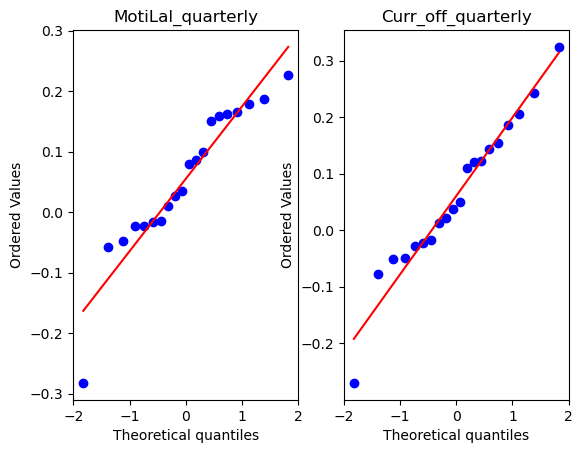

In [6]:
fig = plt.figure()
ax1=plt.subplot(121)
ax2=plt.subplot(122)
m_qqplot=stats.probplot(moti_osw,plot=ax1)
c_qqplot=stats.probplot(curr_offering,plot=ax2)
ax1.set_title('MotiLal_quarterly')
ax2.set_title('Curr_off_quarterly')
plt.show()

Thus we see that the data is Normally distributed.

In [7]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

In [8]:
check_variance_homogeneity(moti_osw, curr_offering)

p value:0.6521
Fail to reject null hypothesis >> The variances of the samples are same.


As the assumptions for Independent t test are satisfied, lets proceed with it.

Null Hypothesis (H0): The mean return of Motilal Oswal is not significantly different from the mean return of Fund B.

Alternative Hypothesis (Ha): The mean return of Motilal Oswal is significantly different than the mean return of our offerings in Mid Cap Category.

Using variable level of confidence.

In [9]:
ttest,p_value = stats.ttest_ind(moti_osw,curr_offering)
print("p value:%.8f" % p_value)
print("since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:%.4f" %(p_value/2))
if p_value/2 <0.1:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")
print(ttest)

p value:0.88647232
since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:0.4432
Fail to reject null hypothesis
-0.14373112670678131


In [10]:
res = pg.ttest(curr_offering, moti_osw, paired=False,confidence=0.6)
print(res)

               T  dof alternative     p-val  \
T-test  0.143731   38   two-sided  0.886472   

                                               CI60%   cohen-d   BF10  \
T-test  [-0.028449442447370937, 0.04000944244737095]  0.045452  0.311   

           power  
T-test  0.052253  


In [11]:
print(moti_osw.mean(),curr_offering.mean())


0.05505000000000001 0.060830000000000016


Lets perform the same test on yearly data for motilal_osw and our offerings.

In [12]:
moti_osw_yr=np.array([0.1071,0.5340,0.0880,0.0905,-0.1221,0.3078])
curr_offering_yr=np.array([0.0612,0.4469,0.2681,-0.0033,-0.1574,0.362])

In [13]:
check_normality(moti_osw_yr)
check_normality(curr_offering_yr)

p value:0.5570
Fail to reject null hypothesis >> The data is normally distributed
p value:0.7733
Fail to reject null hypothesis >> The data is normally distributed


In [14]:
check_variance_homogeneity(moti_osw_yr, curr_offering_yr)

p value:0.5658
Fail to reject null hypothesis >> The variances of the samples are same.


In [15]:
ttest,p_value = stats.ttest_ind(moti_osw_yr,curr_offering_yr)
print("p value:%.8f" % p_value)
print("since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:%.4f" %(p_value/2))
if p_value/2 <0.1:
    print("Reject null hypothesis") 
else:
    print("Fail to reject null hypothesis")
print(ttest)

p value:0.97276728
since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:0.4864
Fail to reject null hypothesis
0.03500160894750176


In [16]:
print("means")
print(moti_osw_yr.mean())
print(curr_offering_yr.mean())
print("median")
print(np.median(moti_osw_yr))
print(np.median(curr_offering_yr))


means
0.16755
0.16291666666666668
median
0.0988
0.16465


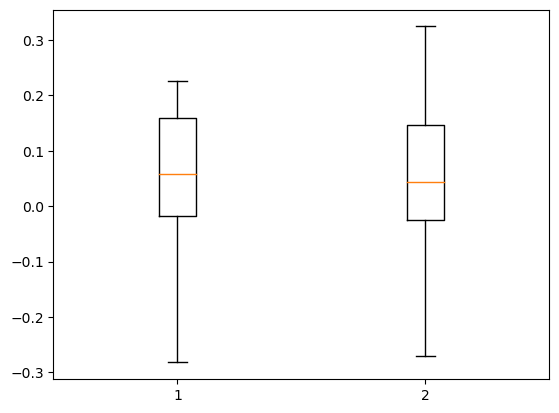

In [17]:
columns=[moti_osw,curr_offering]
fig, ax = plt.subplots()
ax.boxplot(columns)
plt.show()

In [18]:
res = pg.ttest(curr_offering_yr, moti_osw_yr, paired=False,confidence=0.6)
print(res)

               T  dof alternative     p-val  \
T-test -0.035002   10   two-sided  0.972767   

                                              CI60%   cohen-d   BF10     power  
T-test  [-0.12099849657654299, 0.11173182990987633]  0.020208  0.467  0.050116  


Analysis.

In [19]:
quarters=['Q223','Q123','Q422','Q322','Q222','Q122','Q421','Q321','Q221','Q121','Q420','Q320','Q220','Q120','Q419','Q319','Q219','Q119','Q418','Q318']
quarters.reverse()

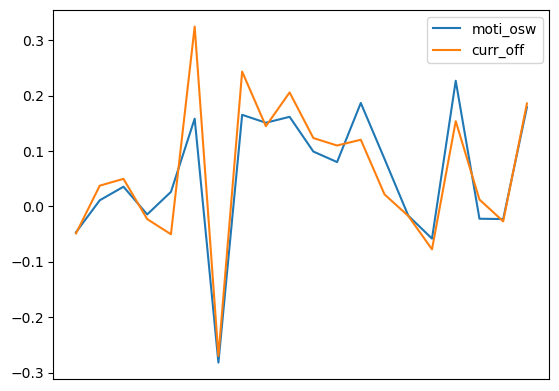

In [20]:
plt.plot(np.flip(moti_osw),label='moti_osw')
plt.plot(np.flip(curr_offering),label='curr_off')
plt.xticks([])
plt.legend()
plt.show()

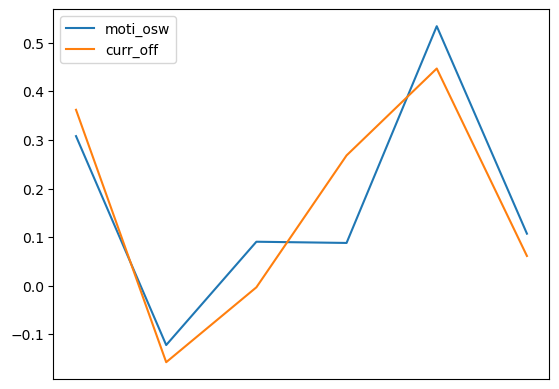

In [21]:
plt.plot(np.flip(moti_osw_yr),label='moti_osw')
plt.plot(np.flip(curr_offering_yr),label='curr_off')
plt.xticks([])
plt.legend()
plt.show()

In [22]:
from scipy import stats
!pip install pingouin
import pingouin as pg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
        return 0
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")
        return 1
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
        return 0
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")
        return 1
def plotqqplot(fundA,fundB):
    fig = plt.figure()
    ax1=plt.subplot(121)
    ax2=plt.subplot(122)
    m_qqplot=stats.probplot(fundA,plot=ax1)
    c_qqplot=stats.probplot(fundB,plot=ax2)
    ax1.set_title('Fund A')
    ax2.set_title('Fund B')
    plt.show()
    
def plotdata(fundA,fundB):
    plt.plot(np.flip(moti_osw),label='fundA')
    plt.plot(np.flip(curr_offering),label='fundB')
    plt.xticks([])
    plt.legend()
    plt.show()
    
def compare_performance(fundA,fundB,level_of_confidence=0.10):
    print("Step 1: Check Normality of data")
    c1=check_normality(fundA)
    c2=check_normality(fundB)
    if(c1==0 or c2==0):
        print("Cant compare the funds as the returns inputed are not normally distributed")
        return
    plotqqplot(fundA,fundB)
    print("Step 2: Check Variance Homogenity of data")
    same_variance=check_variance_homogeneity(fundA, fundB)
    if(same_variance==0):
        print("Cant compare the funds as the returns inputed are dont have the same variance")
        return
    print("Step 3: T-test Results:")
    ttest,p_value = stats.ttest_ind(moti_osw_yr,curr_offering_yr)
    print("p value:%.8f" % p_value)
    print("since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:%.4f" %(p_value/2))
    if p_value/2 <level_of_confidence:
        print("Reject null hypothesis")
    else:
        print("Fail to reject null hypothesis")
    print("tstatistic obtained:",ttest)
    plotdata(fundA,fundB)

Step 1: Check Normality of data
p value:0.0692
Fail to reject null hypothesis >> The data is normally distributed
p value:0.7997
Fail to reject null hypothesis >> The data is normally distributed


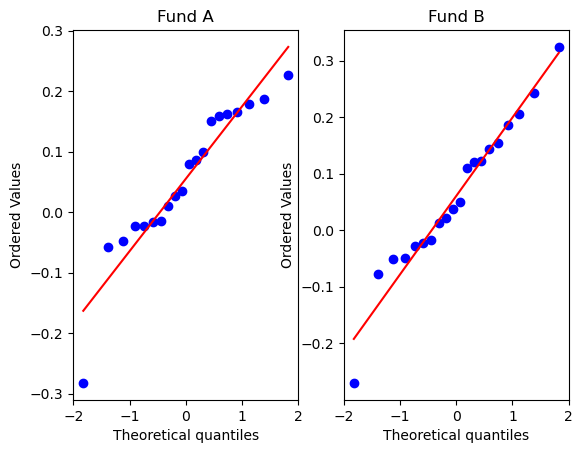

Step 2: Check Variance Homogenity of data
p value:0.6521
Fail to reject null hypothesis >> The variances of the samples are same.
Step 3: T-test Results:
p value:0.97276728
since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:0.4864
Fail to reject null hypothesis
tstatistic obtained: 0.03500160894750176


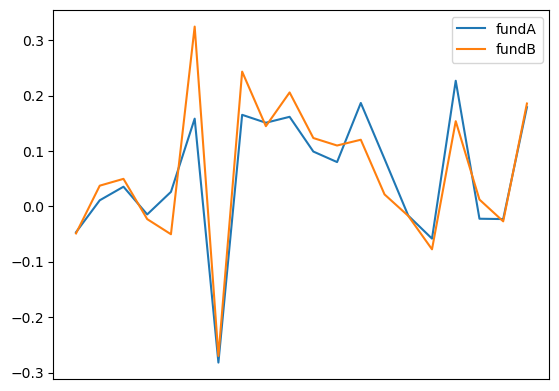

In [23]:
compare_performance(moti_osw,curr_offering)